# 1. SVM 그림 만들기

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# use seaborn plotting defaults
import seaborn as sns; sns.set()

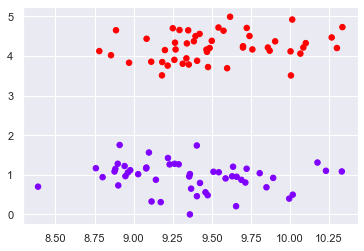

In [11]:
#점을 생성하는 package를 불러옴
from sklearn.datasets import make_blobs
# 점을 생성하는  sample의 갯수,centers는 종류, cluster_std는 점들의 분산 정도임
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=4, cluster_std=0.4)
#x,y축 그래프를 만드는데 s는 점의 크기를 결정하고 c=y를 통해 2개의 색깔을 fix 시킴
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='rainbow')

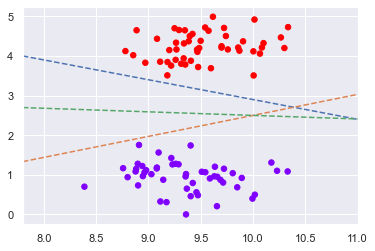

In [12]:
xfit = np.linspace(7.8, 11)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='rainbow')
#보라색과 빨간색 사이를 마구잡이로 경계를 그었음
for m, b in [(-0.5, 7.9), (0.53, -2.8), (-0.09, 3.4)]:
    plt.plot(xfit, m * xfit + b, '--')

plt.xlim(7.8, 11);


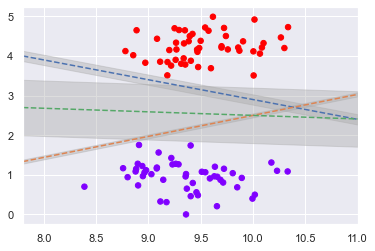

In [13]:
xfit = np.linspace(7.8, 11)
#가로열과 세로열을 뿌림
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='rainbow')

for m, b, d in [(-0.5, 7.9, 0.13), (0.53, -2.8, 0.05), (-0.09, 3.4, 0.7)]:
    yfit = m * xfit + b
    plt.plot(xfit, m * xfit + b, '--')
    #fill_between을 통해서 마진을 표시해봄
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(7.8, 11);

# 2. hard마진과 soft마진

In [51]:
from sklearn.svm import SVC
#SVM 시작
model = SVC(kernel='linear', C=10000, gamma=1)
model.fit(X, y)

SVC(C=10000, gamma=1, kernel='linear')

In [40]:
model.support_vectors_

array([[9.4039846 , 1.74067819],
       [8.91048074, 1.75360701],
       [9.18122783, 3.50991399]])

In [41]:
def svc_decision_function(model, ax=None, plot_support=True):
    #축과 관련된 것을 설정
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # 평가할 모델의 그리드 설정
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    #meshgrid는 격자를 그리는 함수임
    Y, X = np.meshgrid(y, x)
    #ravel()은 다차원을 1차원으로 바꾸어준 후에 concat
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # 마진과 decison boundary를 그려줌
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.7,
               linestyles=['dashed' , 'solid', 'dashed'])
    
    # 서포트벡터 그리기
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=30, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

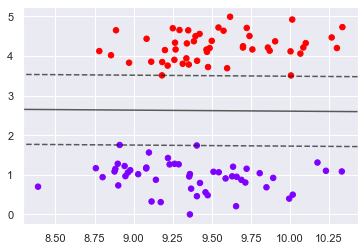

In [42]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='rainbow')
svc_decision_function(model);

In [48]:
x=model.support_vectors_[:,0]

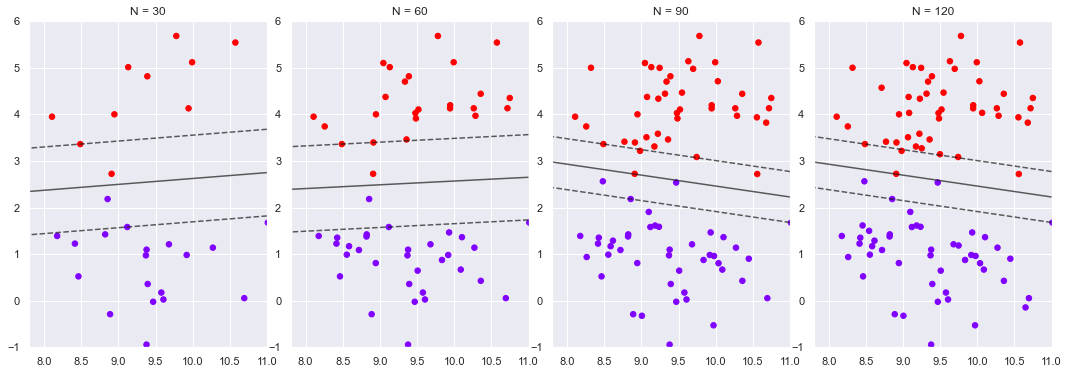

In [25]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=100, centers=2,
                  random_state=4, cluster_std=0.8)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='rainbow')
    ax.set_xlim(7.8, 11)
    ax.set_ylim(-1, 6)
    svc_decision_function(model, ax)

#4개의 subplot으로 작성함
fig, ax = plt.subplots(1, 4, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [30, 60, 90, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

# 3. 선형-> 비선형 커널트릭

In [ ]:
#3차원은 선형커널로 분리가 되지 않음
from sklearn.datasets import make_circles
#점을 만들고 뿌렸을때 다음과 같이 이런 그래프는 선형분류로는 분류가 불가능함 factor는 0.1 점들의 분산인 노이즈는 0.15로 설정함
X, y = make_circles(100, factor=.1, noise=.15)
clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In [ ]:
from mpl_toolkits import mplot3d
r = np.exp(-(X ** 2).sum(1))
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[0, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

In [ ]:
clf = SVC(kernel='rbf', C=1000,gamma=1000000)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');